In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-fine-food-reviews/hashes.txt
/kaggle/input/amazon-fine-food-reviews/Reviews.csv
/kaggle/input/amazon-fine-food-reviews/database.sqlite


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('/kaggle/input/amazon-fine-food-reviews/Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df = df.loc[:, ['Text', 'Score']]
df.head()

,Text,Score
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5


In [5]:
def get_sentiment(value):
    if value > 3:
        return 1
    else:
        return 0

In [6]:
df['Sentiment'] = df['Score'].apply(get_sentiment)

In [7]:
df.head()

,Text,Score,Sentiment
0,I have bought several of the Vitality canned d...,5,1
1,Product arrived labeled as Jumbo Salted Peanut...,1,0
2,This is a confection that has been around a fe...,4,1
3,If you are looking for the secret ingredient i...,2,0
4,Great taffy at a great price. There was a wid...,5,1


# Exploring the data


Sentiment
1    443777
0    124677
Name: count, dtype: int64


<Axes: xlabel='Sentiment', ylabel='count'>

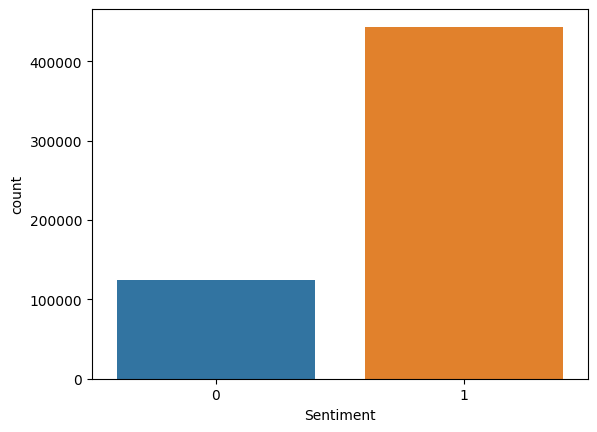

In [8]:
print(df['Sentiment'].value_counts())
sns.countplot(x='Sentiment', data=df)

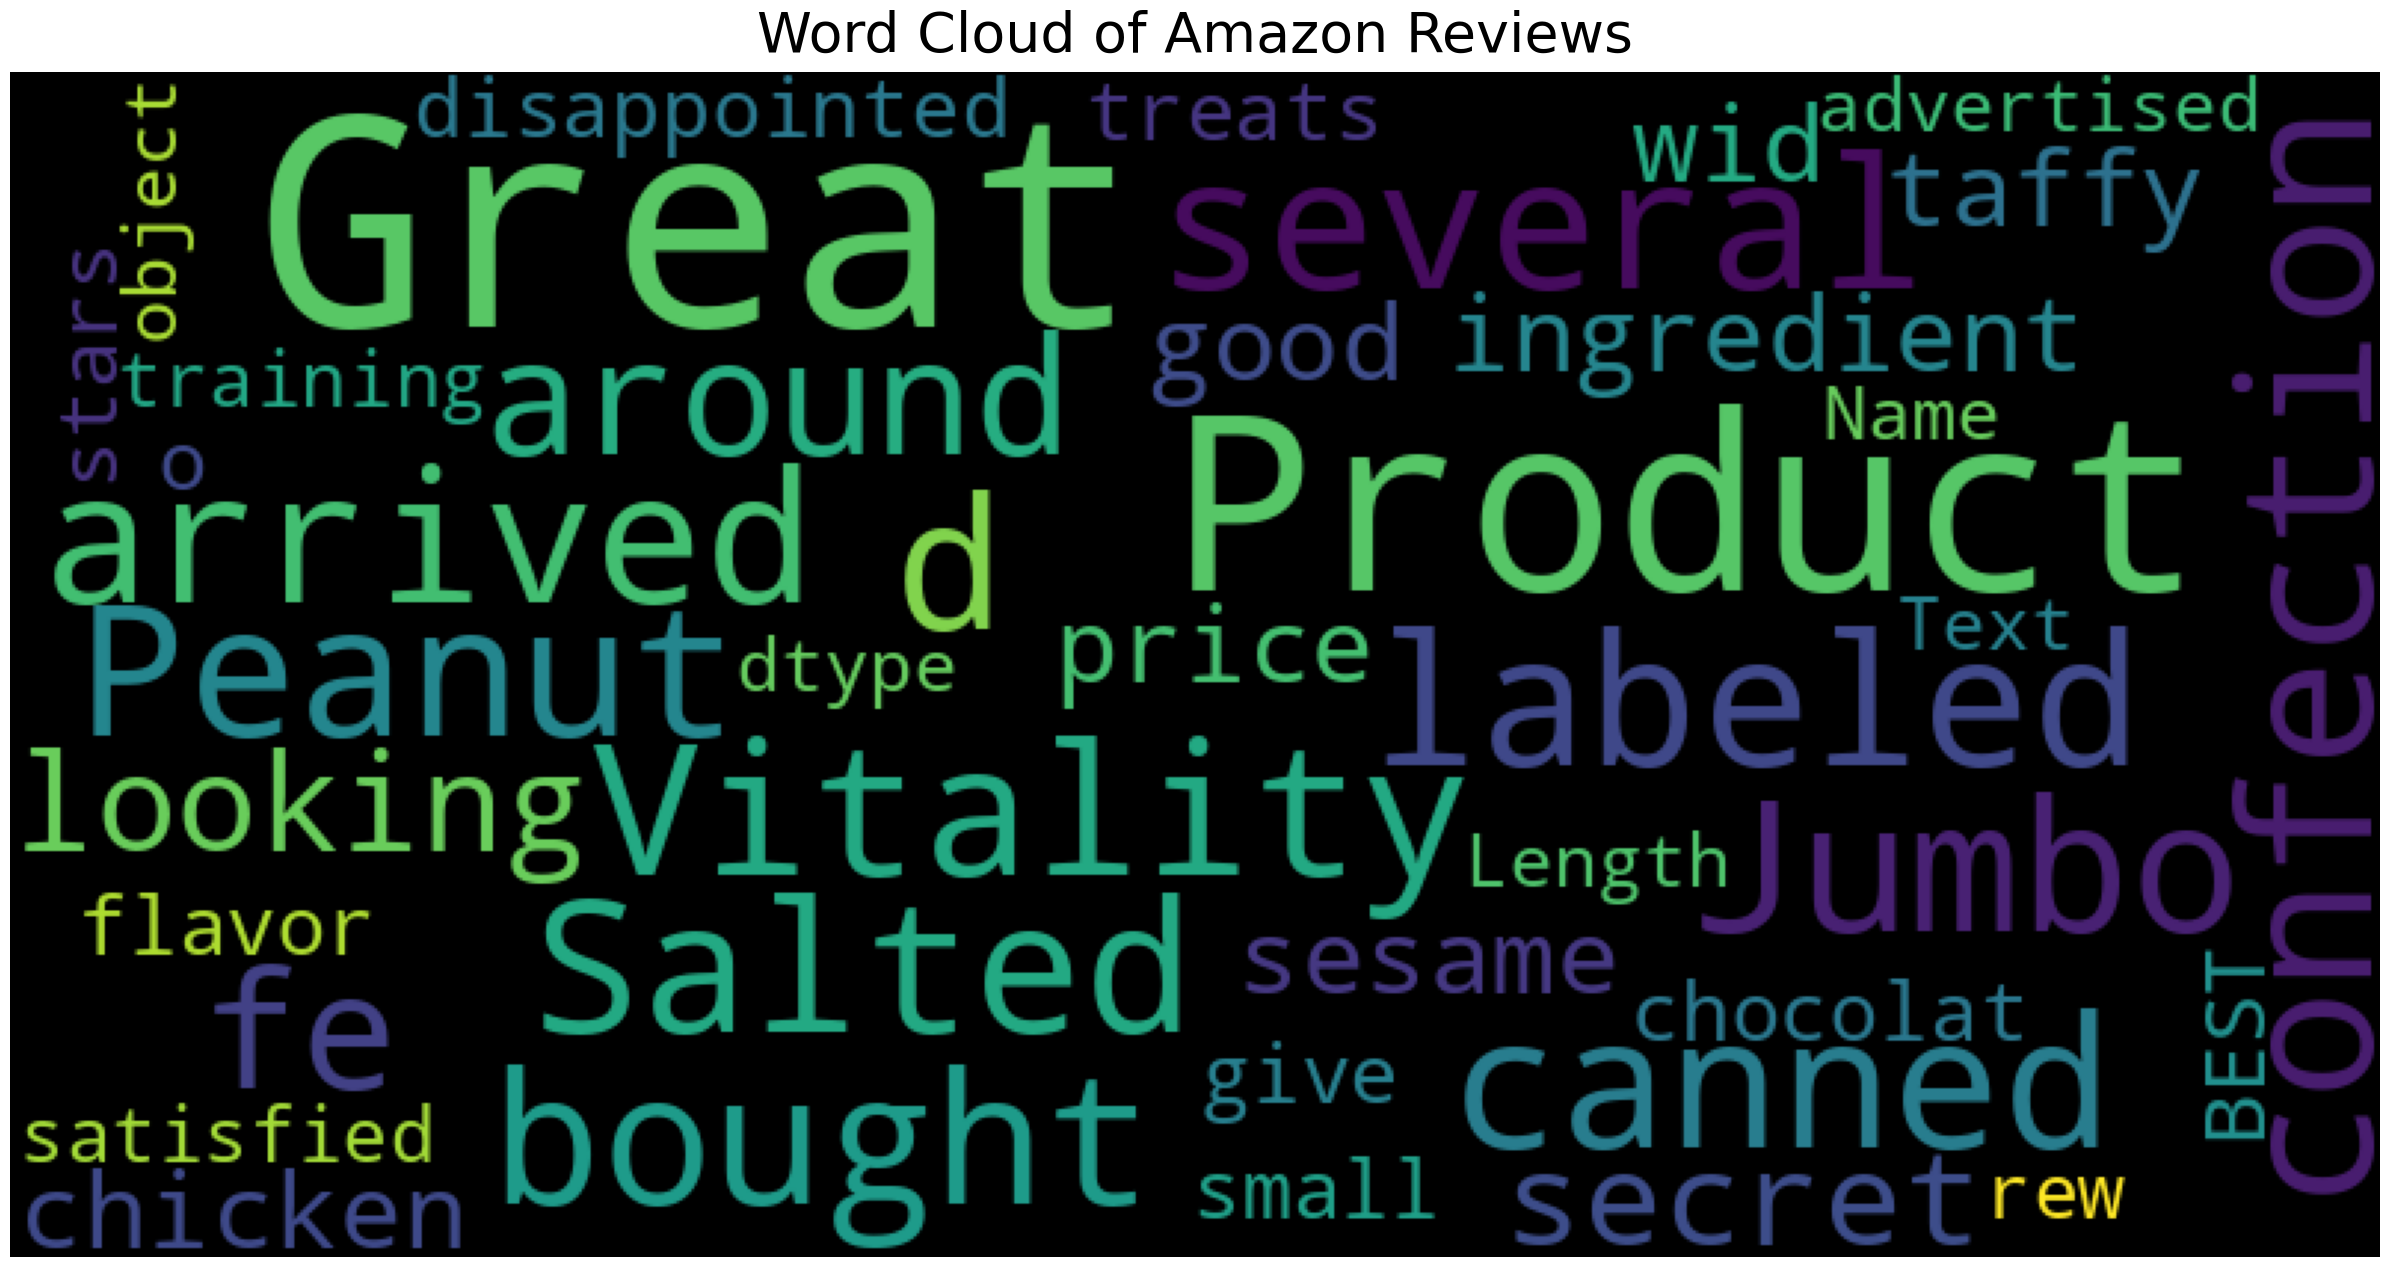

In [9]:
from wordcloud import WordCloud, STOPWORDS

def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)

    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(df['Text'], title="Word Cloud of Amazon Reviews")

In [10]:
import string

df["num_words"] = df["Text"].apply(lambda x: len(str(x).split()))

df["num_unique_words"] = df["Text"].apply(lambda x: len(set(str(x).split())))

df["num_chars"] = df["Text"].apply(lambda x: len(str(x)))

df["num_stopwords"] = df["Text"].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

df["num_punctuations"] = df['Text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

df["mean_word_len"] = df["Text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [11]:
df.head()

,Text,Score,Sentiment,num_words,num_unique_words,num_chars,num_stopwords,num_punctuations,mean_word_len
0,I have bought several of the Vitality canned d...,5,1,48,41,263,25,3,4.479167
1,Product arrived labeled as Jumbo Salted Peanut...,1,0,31,28,190,13,7,5.161290
2,This is a confection that has been around a fe...,4,1,94,70,509,51,18,4.372340
3,If you are looking for the secret ingredient i...,2,0,41,36,219,21,5,4.317073
4,Great taffy at a great price. There was a wid...,5,1,27,22,140,14,5,4.111111


In [12]:
# Truncating some extreme values for better visuals 
df['num_words'].loc[df['num_words']>1000] = 1000 
df['num_punctuations'].loc[df['num_punctuations']>500] = 500
df['num_chars'].loc[df['num_chars']>10000] = 10000

/tmp/ipykernel_27/1720436515.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['num_words'].loc[df['num_words']>1000] = 1000
/tmp/ipykernel_27/1720436515.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

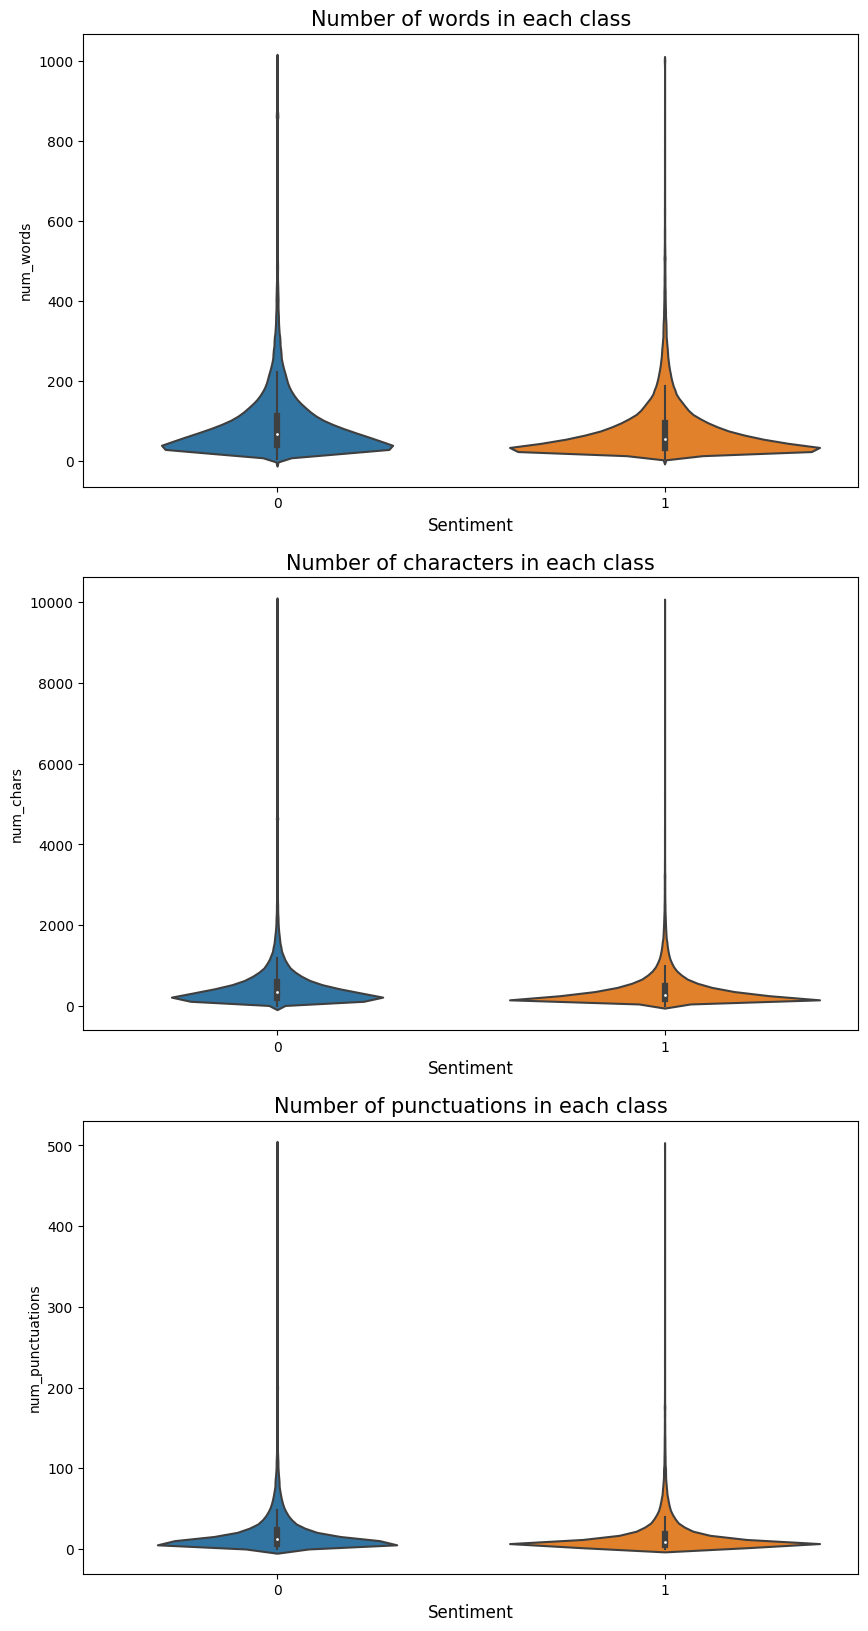

In [13]:
f, axes = plt.subplots(3, 1, figsize=(10,20))
sns.violinplot(x='Sentiment', y='num_words', data=df, ax=axes[0])
axes[0].set_xlabel('Sentiment', fontsize=12)
axes[0].set_title("Number of words in each class", fontsize=15)

sns.violinplot(x='Sentiment', y='num_chars', data=df, ax=axes[1])
axes[1].set_xlabel('Sentiment', fontsize=12)
axes[1].set_title("Number of characters in each class", fontsize=15)

sns.violinplot(x='Sentiment', y='num_punctuations', data=df, ax=axes[2])
axes[2].set_xlabel('Sentiment', fontsize=12)
axes[2].set_title("Number of punctuations in each class", fontsize=15)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Sentiment'], test_size=0.3, random_state=42)

In [15]:
print(X_train.shape)
print(X_test.shape)

(397917,)
(170537,)


# Creating the baseline model(s) - Machine learning models

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [17]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=10000)

word_vectorizer.fit(df['Text'])
train_word_features = word_vectorizer.transform(X_train)
test_word_features = word_vectorizer.transform(X_test)

In [18]:
classifier = LogisticRegression(class_weight = "balanced", C=0.5, solver='sag')
classifier.fit(train_word_features, y_train)

LogisticRegression(C=0.5, class_weight='balanced', solver='sag')

In [19]:
y_pred = classifier.predict(test_word_features)

In [20]:
y_pred[0:5]

array([1, 1, 0, 0, 1])

In [21]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8650029025959176


**Logistic Regression gave an accuracy score of 86%**

**Decision Tree**

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
classifier = DecisionTreeClassifier()

classifier.fit(train_word_features, y_train)

y_pred = classifier.predict(test_word_features)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8699285199106352


**Decision tree gave an accuracy of 87%**

**LSTM**

In [24]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split


2024-03-24 18:37:31.558063: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-24 18:37:31.558166: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-24 18:37:31.864029: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [25]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['Text'])
sequences = tokenizer.texts_to_sequences(df['Text'])


In [26]:
max_sequence_length = 100  
data = pad_sequences(sequences, maxlen=max_sequence_length)


In [27]:
X_train, X_test, y_train, y_test = train_test_split(data, df['Sentiment'], test_size=0.3, random_state=42)


In [28]:
model = Sequential()
model.add(Embedding(10000, 128))  
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))


In [29]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [30]:
model.fit(X_train, y_train, batch_size=128, epochs=5, validation_data=(X_test, y_test))


Epoch 1/5
3109/3109 ━━━━━━━━━━━━━━━━━━━━ 503s 160ms/step - accuracy: 0.8648 - loss: 0.3220 - val_accuracy: 0.9120 - val_loss: 0.2178
Epoch 2/5
3109/3109 ━━━━━━━━━━━━━━━━━━━━ 491s 158ms/step - accuracy: 0.9189 - loss: 0.2046 - val_accuracy: 0.9249 - val_loss: 0.1948
Epoch 3/5
3109/3109 ━━━━━━━━━━━━━━━━━━━━ 484s 156ms/step - accuracy: 0.9347 - loss: 0.1685 - val_accuracy: 0.9296 - val_loss: 0.1828
Epoch 4/5
3109/3109 ━━━━━━━━━━━━━━━━━━━━ 502s 156ms/step - accuracy: 0.9452 - loss: 0.1442 - val_accuracy: 0.9317 - val_loss: 0.1785
Epoch 5/5
3109/3109 ━━━━━━━━━━━━━━━━━━━━ 485s 156ms/step - accuracy: 0.9531 - loss: 0.1255 - val_accuracy: 0.9355 - val_loss: 0.1769


In [31]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)


5330/5330 ━━━━━━━━━━━━━━━━━━━━ 201s 38ms/step - accuracy: 0.9351 - loss: 0.1777
Test accuracy: 0.9355447888374329
